# Аналитика данных с помощью pandas и matplotlib

В этом задании вам предлагается выполнить анализ данных криптовалют с помощью библиотек pandas и matplotlib.
Задание выглядит как лабораторная работа, в которой вам предстоит заполнить недостающие клетки и ответить на ряд вопросов.

Минимальные баллы для зачёта по этой работе - 3 балла. Если вы не набираете тут 3 балла, то по всему курсу вы получаете неуд<br> (см. слайды с семинара №1)

 - [Официальная документация pandas](https://pandas.pydata.org/)
 - [Официальная документация по matplotlib](https://matplotlib.org/index.html)

## 1. Данные (2 балла)

Начнем с необходимых приготовлений.

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl  
import matplotlib.pyplot as plt
import ipywidgets  # Библиотека для интерактивных контролов в jupyter notebook'е
from matplotlib.dates import date2num, DateFormatter

%matplotlib inline

#### Загрузите заранее подготовленный датасет из файла "coins.csv". Создайте объект типа pandas.DataFrame с именем coins и в качестве индекса выберите колонку с датой.

In [2]:
coins = pd.read_csv('./coins.csv', header=0, sep=',', index_col='date')
#coins.set_index('date')

Посмотрим что получилось

In [3]:
coins.head(4)

,price,txCount,txVolume,activeAddresses,symbol,name,open,high,low,close,volume,market
date,,,,,,,,,,,,
2013-04-28,135.30,41702.0,6.879868e+07,117984.0,BTC,Bitcoin,135.30,135.98,132.10,134.21,0.0,1.500520e+09
2013-04-28,4.30,9174.0,4.431952e+07,17216.0,LTC,Litecoin,4.30,4.40,4.18,4.35,0.0,7.377340e+07
2013-04-29,134.44,51602.0,1.138128e+08,86925.0,BTC,Bitcoin,134.44,147.49,134.00,144.54,0.0,1.491160e+09
2013-04-29,4.37,9275.0,3.647810e+07,18395.0,LTC,Litecoin,4.37,4.57,4.23,4.38,0.0,7.495270e+07


Поясним значения хранящиеся в колонках
 - date - дата измерений
 - name - полное название монеты
 - symbol - сокращенное название монеты
 - price - средняя цена монеты за торговый день в USD
 - txCount - количество транзакций в сети данной монеты
 - txVolume - объем монет переведенных между адресами в сети данной монеты
 - activeAddresses - количество адресов совершавших а данный день транзации в сети данной монеты
 - open - цена монеты в начале торгов данного дня
 - close - цена монеты в конце торгов данного дня
 - high - самая высокая цена данной монеты в течение данного торгового дня
 - low - самая низкая цена данной монеты в течение данного торгового дня
 - volume - объем торгов данной монетой на биржах в данный день
 - market - капитализация данной монеты в данный день

#### Изучим полученные данные. Ответьте на следующие вопросы (вставляйте клетки с кодом и тектом ниже):
#### 1. Сколько всего различных монет представлено в датасете? (0.4 балла)

In [4]:
different_coins = coins['name'].unique().tolist()
len(different_coins)

70

#### 2. За какой период данные мы имеем? (0.4 балла)

In [5]:
print("first day: ", coins.index.min())
print("last day: ", coins.index.max())

first day:  2013-04-28
last day:  2018-06-06


#### 3. Есть ли пропуски в данных? Какой природы эти пропуски? (0.5 балла)

In [6]:
#природа пропусков - отсутствие каких-либо данных (Nan и тд)
if coins.isna().values.any() :
    print("yes, there are skips")
else:
    print("no skips")

yes, there are skips


#### 4. У какой монеты и когда была самая высокая цена? (0.2 балла)

In [7]:
coins[coins['high'] == coins['high'].max()]['name']

date
2017-12-17    Bitcoin
Name: name, dtype: object

#### 5. У какой монеты самая высокая и самая низкая суммарная капитализация? Постройте круговую диаграмму с долями. (0.5 балла)

                market
name                  
KingN Coin  10608251.0
               market
name                 
Bitcoin  5.743947e+13


/home/polina/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:22: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.


<Figure size 432x288 with 0 Axes>

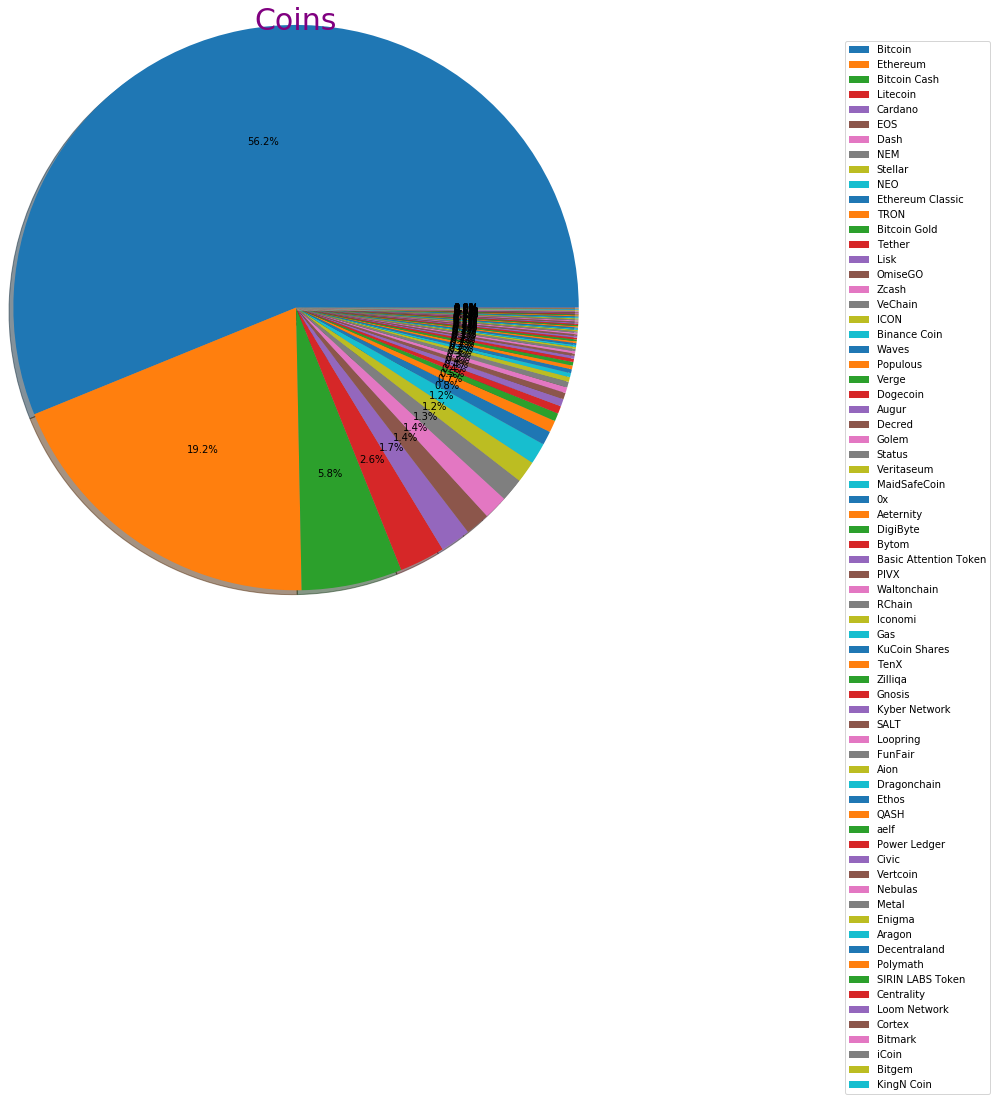

In [8]:
sum_price = coins[['name', 'market']].groupby(by='name').sum() #считаем капитализации
sum_price.sort_values(by='market', ascending=False, inplace=True) #сортируем капитализации
Max = int(sum_price.max())
Min = int(sum_price.min())
print(sum_price[sum_price['market'] == Min]) #минимальная капитализация
print(sum_price[sum_price['market'] == Max]) #максимальная капитализация

plt.figure(0)
plt.subplots(figsize = (10, 10))

plt.title(
    'Coins', 
    size = 30, 
    color = 'purple'
)

plt.pie(
    sum_price, 
    autopct='%1.1f%%', 
    radius = 1.3, 
    shadow=True, 
    rotatelabels=True
)

plt.legend(
    sum_price.index, 
    loc='upper left', 
    bbox_to_anchor=(1.5, 1)
)

plt.show()

## 2. Визуализация (1 балл)

Самая интересная часть работы аналитика состоит во внимательном вглядывании в правильно выбранные и построенные графики.

#### Реализуйте функцию для визуализации цен выбранной валюты за выбранный диапазон дат.
На графике должны быть видны цены начала и конца продаж. А так же минимальная и максимальная цена за этот день.
Подпишите график и оси координат. Добавьте сетку. Увеличьте размер изображения.
Можете попробовать использовать matplotlib.finance.candlestick_ohlc (mpl_finance.candlestick_ohlc), но можно и без него.

In [11]:
def plot_fancy_price_action(coins, symbol, start_date, end_date):
    coins_for_plot = coins.loc[(coins['symbol'] == symbol) & (coins.index >= start_date) & (coins.index <= end_date), ['high', 'low', 'open', 'close']]
    
    x_min = coins_for_plot['low'].keys()
    y_min = coins_for_plot['low'].values
    
    x_max = coins_for_plot['high'].keys()
    y_max = coins_for_plot['high'].values
    
    x_open = coins_for_plot['open'].keys()
    y_open = coins_for_plot['open'].values
    
    x_close = coins_for_plot['close'].keys()
    y_close = coins_for_plot['close'].values
    
    # Создать рисунок 
    fig = plt.figure(
        figsize=(16, 9),
        dpi=200  # разрешением 200 точек
    )
    
    plt.title(
        'Currency price', 
        fontsize=20)
    
    plot_min = plt.plot(
        x_min, y_min,
        color='red',
        linestyle='-', 
        alpha=1,
        linewidth=1,  # Толщина
        label='Min price per day' # Подпись в легенде. 
    )
    
    plot_max = plt.plot(
        x_max, y_max,
        color='black',
        linestyle='-', 
        alpha=1,
        linewidth=1,  # Толщина
        label='Max price per day' # Подпись в легенде. 
    )
    
    plot_open = plt.plot(
        x_open, y_open,
        color='blue',
        linestyle='-', 
        alpha=1,
        linewidth=1,  # Толщина
        label='Coin price at the beginning of the trading day' # Подпись в легенде 
    )
    
    plot_close = plt.plot(
        x_close, y_close,
        color='purple',
        linestyle='-', 
        alpha=1,
        linewidth=1, 
        label='Coin price at the end of the trading day' 
    )
    
    plt.legend(
        loc='lower left',  
        borderaxespad=5
    )
    
    plt.xlabel(
        'Days',  # Текст
        fontdict=dict(family='serif', color='darkred', weight='normal', size=20)  # Настройки шрифта
    )
    
    plt.ylabel(
        'Prices',
        #rotation=('horizontal'), 
        fontdict=dict(family='monospace', color='peru', weight='light', size=25)
    )

    plt.grid(True)
    plt.show()

Посмотрим, что получилось:

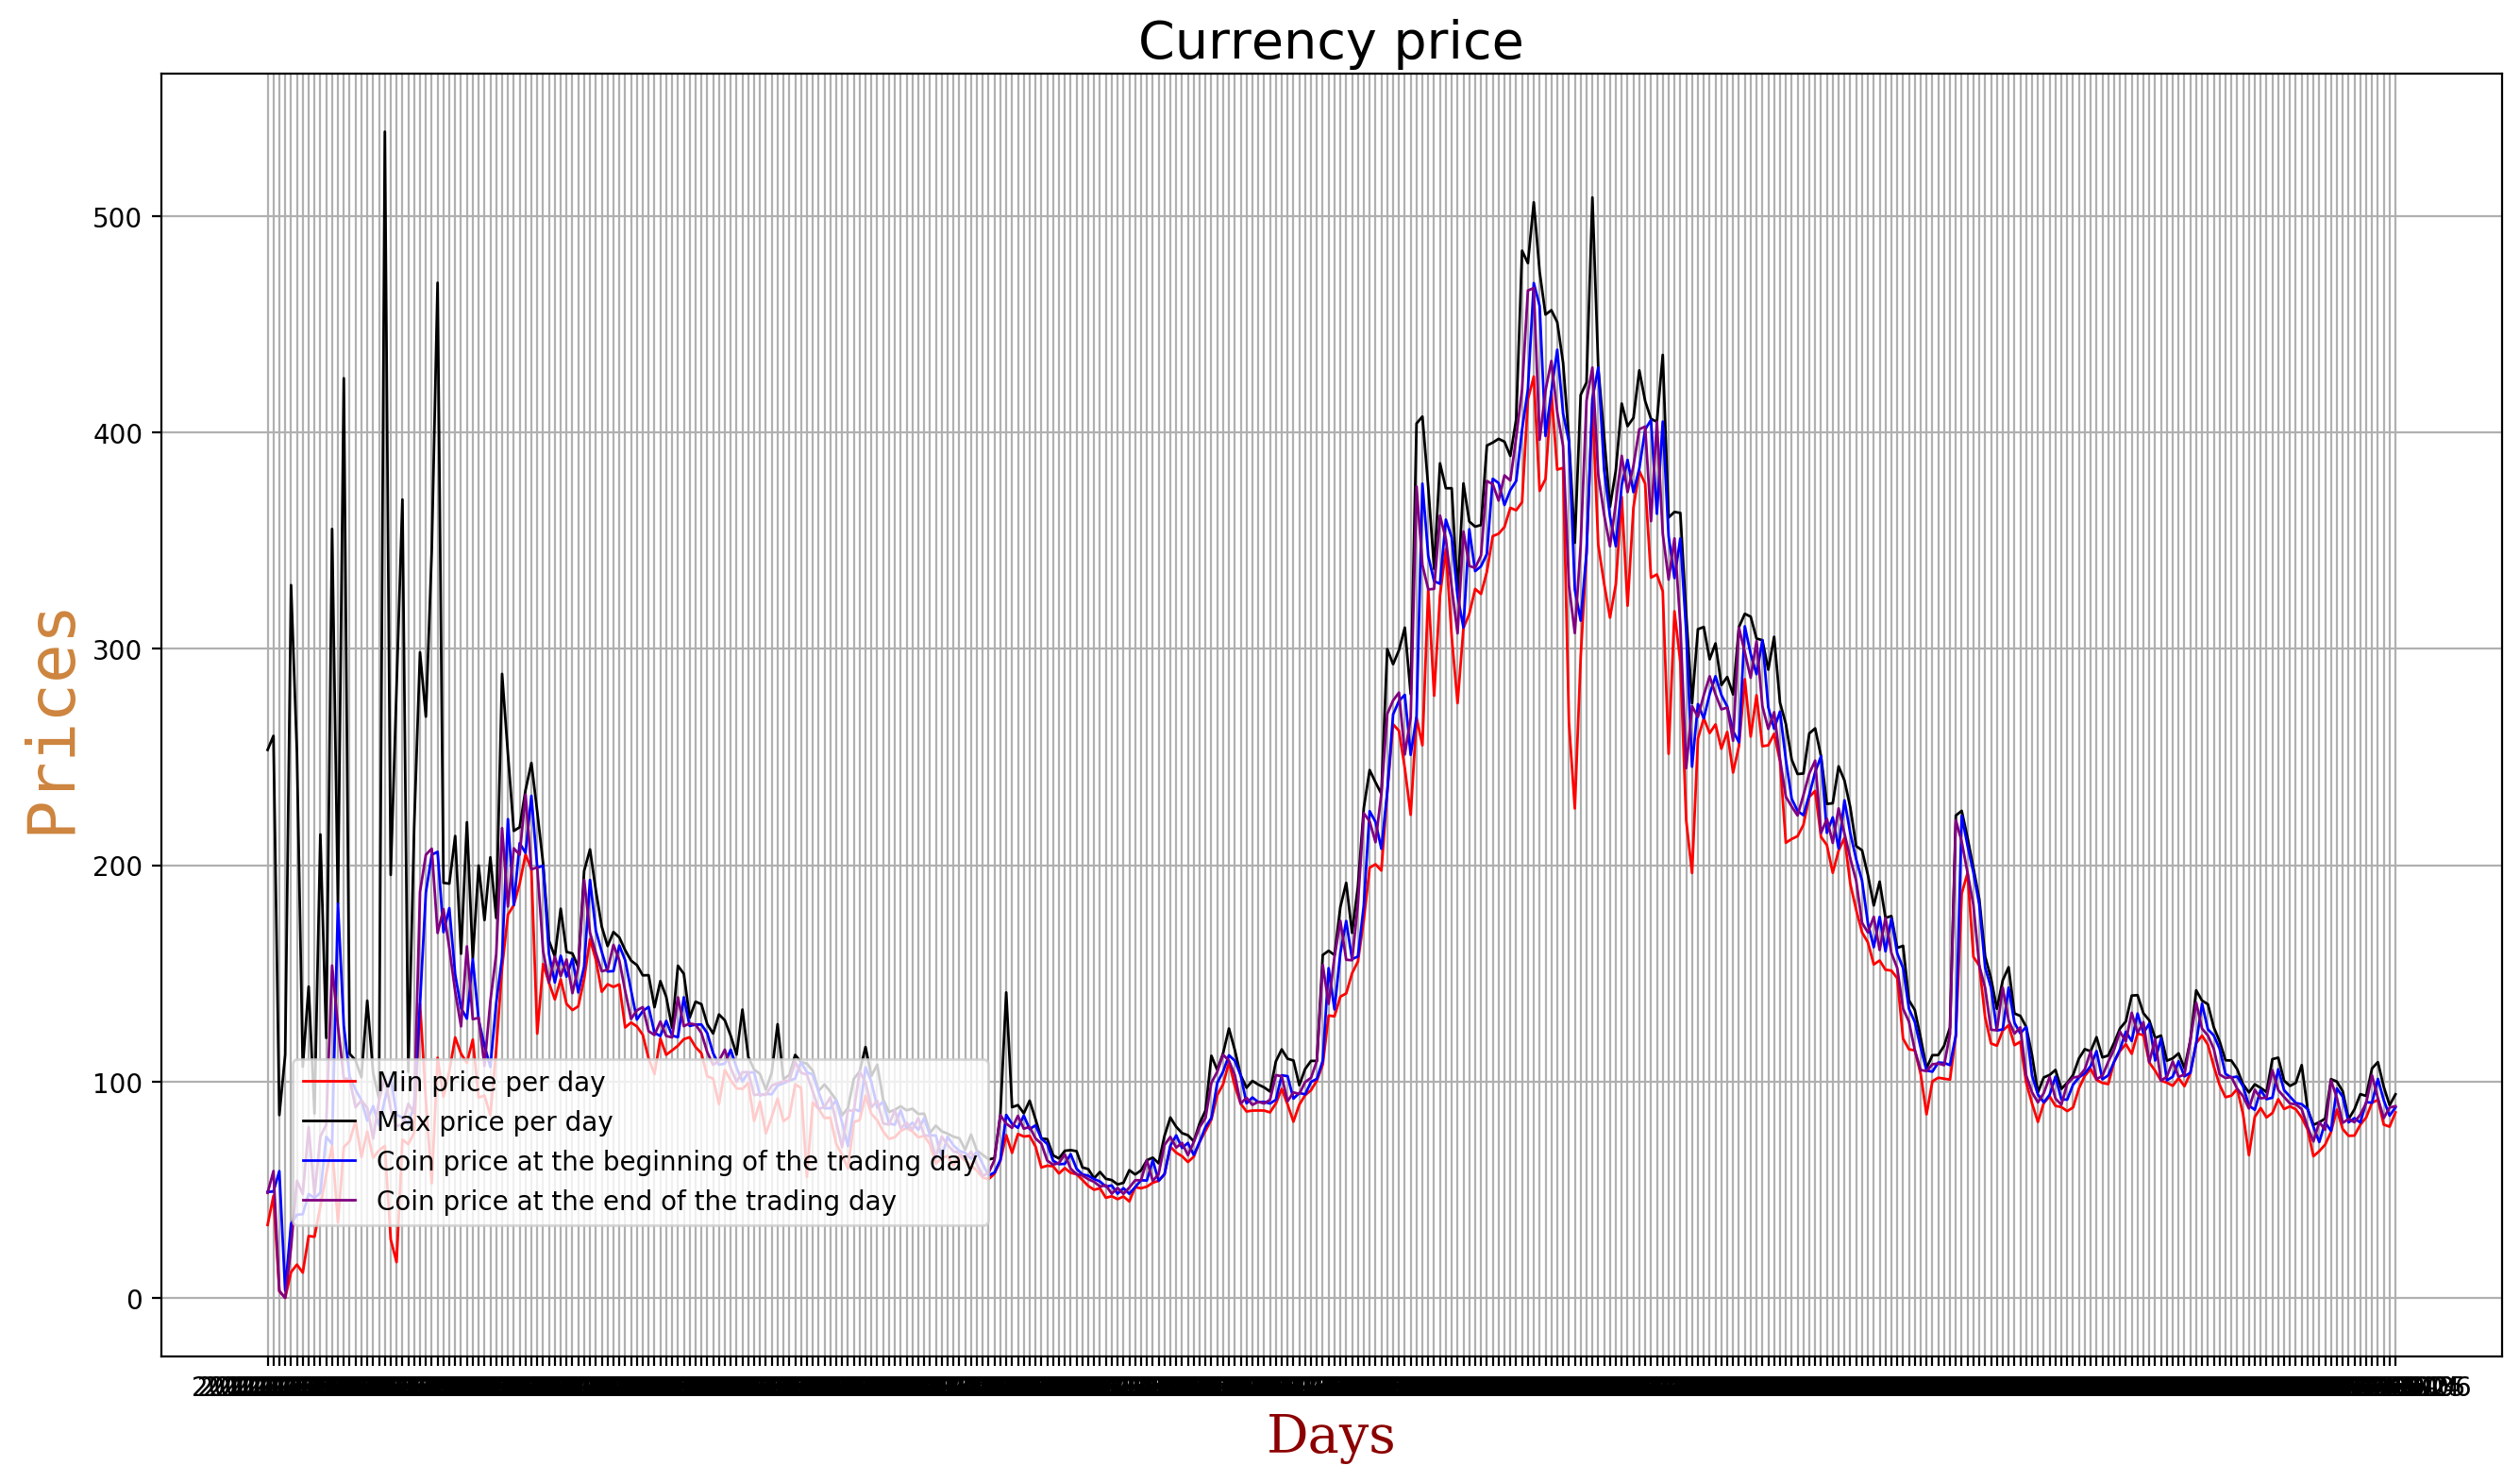

In [12]:
plot_fancy_price_action(coins=coins, symbol='VERI', start_date='2013-06-01', end_date='2019-06-30') 

Никакого датасаенса в этом задании нет. Просто аналитик должен уметь строить графики, либо знать готовые инструменты.

## 3. Накачка и сброс (1 балл)
Криптовалютные биржи до сих пор остаются маргинальным местом, эдаким диким западом финансового мира. Как следствие, здесь процветают схемы относительно
честного отъема денег. Одна из них - pump'n'dump (накачка и сброс). Она выглядит следуюшим образом. Несколько крупных игроков или много мелких договариваются
вместе купить малоизвестную монету с низкой ценой и объемом торгов. Это приводит к мгновенному взлету цены (pump), далее приходят неопытные игроки в надежде
успеть заработать на таком росте. В этот момент организаторы схемы начнают все продавать (dump). Весь процесс занимает от нескольких минут до нескольких часов.

#### Ваша задача найти самый сильный pump'n'dump монеты на заданном промежутке времени. Для этого для каждого дня определим число pnd равное отношению максимальной цены монеты в данный день к максимуму из цен открытия и закрытия в тот же день. Нужно найти день когда pnd был максимален и величину pnd.

In [16]:
def find_most_severe_pump_and_dump(coins, symbol, start_date, end_date):
    data_frame = coins[(coins.symbol == symbol) & (coins.index >= start_date) & (coins.index <= end_date)]
    data_frame = data_frame[['open', 'close', 'high']]
    data_frame['pnd'] = data_frame.apply(lambda row: row['high'] / max(row['open'], row['close']), axis=1)
    max_pnd = data_frame[data_frame.pnd == data_frame.pnd.max()]
    return max_pnd.index.item(), max_pnd.pnd.item()

In [17]:
find_most_severe_pump_and_dump(coins, symbol='BTC', start_date='2017-06-01', end_date='2018-06-01')

/home/polina/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  


('2017-11-29', 1.1428940004366206)

#### Сравните эти значения для разных монет.

In [18]:
symbols = coins.symbol.unique().tolist()
pnds = {}
for s in symbols:
    pnds[s] = find_most_severe_pump_and_dump(coins, s, coins.index.min(), coins.index.max())
pnd_frame = pd.DataFrame.from_dict(pnds, orient='index', columns=['date', 'pnd'])
pnd_frame.sort_values('pnd', ascending=False, inplace=True)
pnd_frame.head(10)

/home/polina/.conda/envs/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: `item` has been deprecated and will be removed in a future version
  


,date,pnd
VERI,2017-06-11,33.549254
DGB,2014-02-27,32.119149
FUN,2017-06-29,12.490562
TRX,2017-09-16,9.651010
BTM,2018-03-13,7.177933
BTG,2018-02-21,5.777033
RHOC,2017-10-08,5.075208
DASH,2015-09-17,4.782427
LRC,2017-09-23,4.528409
PIVX,2016-08-18,4.384741


#### здесь представлены первые 10 валют, в которые не стоило вкладываться

## 4. Окупаемость инвестиций (1 балл)

#### Вам нужно посчитать окупаемость инвестиций в криптовалюты на заданном промежутке времени. Окупаемость определяется как отношение изменения цены портфеля к исходной цене портфеля. Цена портфеля - это суммарная стоимость (в USD) всех монет в портфеле.
investments - dict в котором ключи - это названия монет, значения - это сумма вложений в эту монету (в USD)

In [19]:
def compute_roi(coins, investments, start_date, end_date):
    first_sum = 0 #сумма в start_date
    second_sum = 0 #сумма в end_date
    for coins_name, invest_sum in investments.items():
        first_sum += invest_sum * coins.loc[(coins.index == start_date) & (coins.symbol == coins_name)]['price'].values[0]
        second_sum += invest_sum * coins.loc[(coins.index == end_date) & (coins.symbol == coins_name)]['price'].values[0]
    return (second_sum - first_sum) / first_sum #окупаемость

In [20]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2018-04-04', end_date='2018-06-01')

0.004831614576721986

In [21]:
compute_roi(coins, investments={'BTC': 1000, 'LTC': 500}, start_date='2013-05-28', end_date='2018-06-06')

57.53575236064575

## 5. Технический анализ (1 балл)

Технический анализ это способ предсказания поведения графика по некоторым вспомогательным величинам построенным по исходному графику. Один из простейших методов технического анализа - границы Болинджера. Кто-то верит, что график касаясь границы от него должен отражаться.

#### Нарисуйте график цены, скользящее среднее и [границы Боллинджера](https://en.wikipedia.org/wiki/Bollinger_Bands) c параметрами N (window) = 21, K (width) = 2.

Границы считаются очень просто: (MA + Kσ) и (MA - Kσ), где MA - скользящее среднее за N дней, а σ - скользящее стандартное отклонение за N дней.

Тут вам поможет функция rolling для подсчёта среднего и стандартного отклонения по скользящему окну.

Не забудьте подписать график и оси, отрисовать легенду и выбрать для нее лучшее расположение.

In [ ]:
def plot_bollinger_bands(coins, symbol, window, width):
    # Paste your code here

In [ ]:
plot_bollinger_bands(coins=coins, symbol='EOS', window=21, width=2)  # тут должен появиться график

#### Сделайте вывод о том, выполнялось ли правило Боллинджера.

## 6. Капитализация как индикатор (1 балл)

Многие люди, которые торгуют криптовалютой, любят смотреть на капитализацию. Давайте поймём почему.

#### Нарисуйте еще два графика. На первом должна быть общая капитализация биткойна (BTC), эфира (ETH), еос (EOS), биткойн кэша (BCH), стеллара (XLM) и лайткойна (LTC). На втором - доли капитализаций этих монет от общей капитализации рынка. При этом используйте данные начиная с 2017-07-01.

In [24]:
def plot_coins_capitalizations(coins, symbols, start_date):
    data_frame = coins[coins.index >= start_date]
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 10))
    ax1.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    ax1.set_title('Market', fontdict={'size': 18})
    ax1.set_ylabel('Market', fontdict={'size': 14})
    ax1.set_xlabel('Date', fontdict={'size': 14})
    ax2.xaxis.set_major_formatter(DateFormatter('%Y-%m'))
    ax2.set_title('Market percentage', fontdict={'size': 18})
    ax2.set_ylabel('Market percentage', fontdict={'size': 14})
    ax2.set_xlabel('Date', fontdict={'size': 14})
    ax2.set_ylim([0, 100])
    total_capit = data_frame.market.groupby('date').sum()
    for symb in symbols:
        data = data_frame[data_frame.symbol == symb]
        ax1.plot(date2num(pd.to_datetime(data.index).to_pydatetime()), data.market, label=symb)
        perc = data.market / total_capit * 100
        ax2.plot(date2num(pd.to_datetime(perc.index).to_pydatetime()), perc, label=symb)
    ax1.legend(loc='best')
    ax1.grid(which='both')    
    ax2.legend(loc='best')
    ax2.grid(which='both')
    plt.show()    

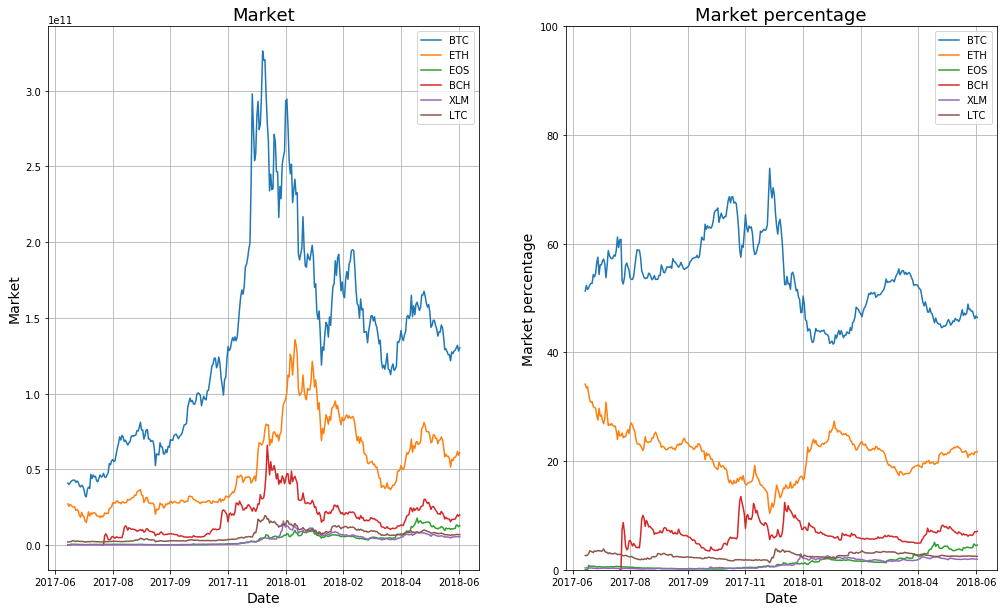

In [25]:
plot_coins_capitalizations(
    coins=coins,
    symbols=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC'),
    start_date='2017-07-01'
)

#### Проанализируйте зависимость доли капитализации альткойнов от доли капитализации биткойна. Как выдумаете, в чём причина такой зависимости?

Зависимость немного отличается для разных альткойнов, но в целом картина следующая: зависимость линейна, чем больше капитализации биткоина, тем меньше доля капитализацции альткойнов. Эта картина соответствует здравому смыслу, так как алткойнам приходится отдавать долю рынку биткоину или забирать у него.

## 7. Корреляции монет (1 балл)

#### Теперь нужно подробнее посмотреть на корреляции средних капитализаций монет. При этом будем смотреть на среднее сглаженное за последние window дней до дня date с коэффициентом сглаживания alpha для набора монет symbols.  
#### Реализуйте функцию, которая будет возвращать квадратный DataFrame с числом строк и столбцов равным числу рассматриваемых монет и со значениями корреляций.

In [26]:
def calc_coins_correlations(coins, date, symbols, window, alpha):
    answer_list = []
    corr = np.zeros((len(symbols), len(symbols))) #массив из нулей
    for elem in symbols:
        df = coins[(coins.index <= date) & (coins.symbol == elem)] #отбираем необходимые данные
        answer_list.append(df.market.ewm(alpha=alpha).mean().tail(window)) #заполняем лист значений
    for elem in range(len(symbols)):
        for j in range(len(symbols)):
            corr[elem][j] = answer_list[elem].corr(answer_list[j])
    return pd.DataFrame(data=corr, columns=symbols, index=symbols) #выводим ответ

In [27]:
correlations = calc_coins_correlations(coins, date="2018-06-06",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1,0.99,0.9,1,0.99,1,0.99
ETH,0.99,1,0.86,0.98,0.97,0.99,0.97
EOS,0.9,0.86,1,0.93,0.93,0.91,0.94
BCH,1,0.98,0.93,1,1,1,1
XLM,0.99,0.97,0.93,1,1,1,1
LTC,1,0.99,0.91,1,1,1,0.99
ADA,0.99,0.97,0.94,1,1,0.99,1


Довольно интересно ещё взглянуть на 2017-12-27:

In [20]:
correlations = calc_coins_correlations(coins, date="2017-12-27",
                                       symbols=['BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'],
                                       window=21, alpha=0.1)
# Теперь посмотрим на эти корреляции следующим образом:
correlations.style.background_gradient(cmap='coolwarm').set_precision(2)

,BTC,ETH,EOS,BCH,XLM,LTC,ADA
BTC,1,0.91,0.89,0.73,0.92,0.96,0.84
ETH,0.91,1,1,0.94,1,0.99,0.98
EOS,0.89,1,1,0.95,1,0.98,0.99
BCH,0.73,0.94,0.95,1,0.93,0.88,0.97
XLM,0.92,1,1,0.93,1,0.99,0.98
LTC,0.96,0.99,0.98,0.88,0.99,1,0.95
ADA,0.84,0.98,0.99,0.97,0.98,0.95,1


## 8. Анализ одной стратегии (2 балла)

Разберем один мечтательный пример. Посмотрим какую прибыль могла бы нам принести хрестоматийная торговая стратегия основанная на скользящих средних. Стратегия выглядит следующим образом: мы строим две скользящие среднии для графика цены. С маленьким окном (ведущее скользящее среднее) и с бОльшим окном (запаздывающее скользящее среднее). Мы покупаем, когда ведущее среднее становится больше запаздывающего, и продаем в противном случае. Посмотрим на пример

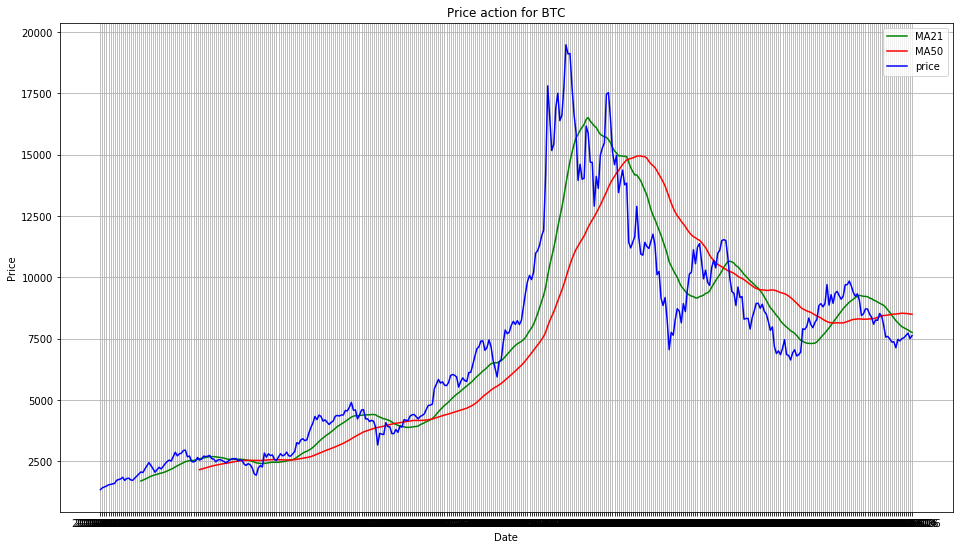

In [28]:
def plot_moving_averages(coins, symbol, leading_window, lagging_window, start_date, end_date):
    coin = coins[coins['symbol'] == symbol][start_date:end_date]
    price = coin['price']
    leading_mean = price.rolling(window=leading_window).mean()
    lagging_mean = price.rolling(window=lagging_window).mean()

    fig = plt.figure(figsize=(16, 9))
    ax = fig.add_subplot(111)
    
    ax.set_title('Price action for {}'.format(symbol))
    ax.plot(leading_mean, color='green', label='MA{}'.format(leading_window))
    ax.plot(lagging_mean, color='red', label='MA{}'.format(lagging_window))
    ax.plot(price, color='blue', label='price')
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(loc='best')
    ax.grid(True)
    plt.show() 

plot_moving_averages(
    coins=coins, 
    symbol='BTC', 
    leading_window=21, 
    lagging_window=50, 
    start_date='2017-05-01',
    end_date='2018-08-01')

Видно, что для скользящее среднее с бОльшим окном медленнее реагирует на изменение цены. Именно на этой идее и основана торговая стратегия.
#### Реализуйте функцию, которая строит два графика. На правом будут изображены цена и скользящие средние. На левом - во сколько раз изменится размер вложений при использовании нашей стратегии и при обычном инвестировании 

#### Notes:
Давайте использовать только цены закрытия. При этом, чтобы узнать цены за вчерашний день, стоит использовать метод shift(1) у Series.
Отношение цен закрытия за сегодня и за вчера - это мой multiplier за сегодняшний день. При этом давайте строить графики накопления для multipliers. Т.е. если мы смотрим на 3 дня и в первый день multiplier = 1.5, во второй- 0.5 и в третий 2. То график будет выглядеть так: (1.5, 1.5 * 0.5, 1.5 * 0.5 * 2).

При использовании нашей новой стратегии мы будем либо покупать, если ведущее среднее становится больше запаздующего на некоторый threshold (при этом лучше разницу сперва поделить на цену), либо оставлять всё как есть. При этом, конечно, нужно, принимая решения за сегодняшний день, смотреть только на статистику из прошлого.

In [ ]:
def plot_moving_averages_strategy(
    coins, symbol, lead_window, lag_window, threshold, start_date, end_date
):
    # Paste your code here

In [ ]:
# Теперь на основе реализованной функции сделаем интерактивные графики и поизучаем, что получилось:
symbol_selector = ipywidgets.Dropdown(
    options=('BTC', 'ETH', 'EOS', 'BCH', 'XLM', 'LTC', 'ADA'),
    index=0,
    value='BTC',
    layout={'width': '700px'},
    continuous_update=False
)

lead_window_slider = ipywidgets.IntSlider(
    value=21, 
    min=1, 
    max=200, 
    step=1,
    layout={'width': '700px'},
    continuous_update=False)

lag_window_slider = ipywidgets.IntSlider(
    value=50,
    min=1, 
    max=200, 
    layout={'width': '700px'},
    step=1, continuous_update=False)

threshold_slider = ipywidgets.FloatSlider(
    min=0, 
    max=0.20, 
    step=0.001, 
    value=0.025,
    layout={'width': '700px'},
    continuous_update=False)

start_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2017-05-01'),
    layout={'width': '700px'},
    continuous_update=False
)

end_date_slider = ipywidgets.SelectionSlider(
    options=pd.date_range('2013-04-28', '2018-06-06', freq='D'),
    index=0,
    value=pd.Timestamp('2018-01-01'),
    layout={'width': '700px'},
    continuous_update=False
)

ipywidgets.interact(
    plot_moving_averages_strategy,
    coins=ipywidgets.fixed(coins),
    symbol=symbol_selector,
    lead_window=lead_window_slider,
    lag_window=lag_window_slider,
    threshold=threshold_slider,
    start_date=start_date_slider,
    end_date=end_date_slider
)

#### Попробуйте разные значения параметров для разных монет и сделайте выводы о применимости такой модели.

## 9. Отказ от ответственности 
Все примеры разобранных здесь стратегий являются игрушечными и не подходят для реальной торговли на бирже. Без серьезной подготовки вас там съедят с потрохами.

![Disclamer](https://i0.kym-cdn.com/entries/icons/mobile/000/024/785/Screen_Shot_2017-11-30_at_1.12.37_PM.jpg)